## Details

- Name: Suvashin Moodliar
- Student Number: 10116408
- Module: PDAN8412
- Task: 1

## Theory

### What is a Recurrent Neural Network?

A Recurrent Neural Network (RNN) is a specialized type of artificial neural network designed to handle sequential data by maintaining a form of 'memory' of previous inputs. This feature is crucial for tasks where the context from earlier data points is essential, such as in time series forecasting or natural language processing. Unlike traditional feedforward neural networks, which process inputs independently of each other, RNNs have connections that form directed cycles, allowing information to persist. This makes RNNs particularly effective for recognizing patterns in sequences of data, such as spoken language or written text, where the order of the data points matters (Awan, 2022).

The ability of RNNs to process sequences makes them highly suitable for various applications. For example, in natural language processing (NLP), RNNs can be used to model the structure of sentences, predict the next word in a sentence, or even generate text that resembles human writing. In time series prediction, RNNs are employed to forecast future values based on previous data points, which is essential in fields like finance and weather prediction. Additionally, RNNs are widely used in speech recognition systems, where they transcribe spoken words into text by recognizing patterns over time (IBM, n.d.).

However, RNNs are not without their challenges. One of the main issues they face is the vanishing gradient problem, which occurs when the gradients used to train the network become too small to make significant updates to the model's weights. This problem is particularly acute when dealing with long sequences, where the influence of earlier inputs tends to diminish as the sequence progresses (Awan, 2022). To address this issue, more advanced RNN architectures, such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs), have been developed. These variants introduce mechanisms to preserve important information over longer sequences, effectively mitigating the vanishing gradient problem and improving the network's ability to learn long-term dependencies (Barat, 2023).

RNNs are a powerful tool for modeling sequential data, with applications ranging from language processing to time series prediction. Their ability to maintain a form of memory makes them uniquely suited for tasks where the order and context of the data are critical. While they do face challenges such as the vanishing gradient problem, innovations like LSTMs and GRUs have extended their applicability to more complex tasks.

### Appropriate Dataset

#### Dataset Source

- Dataset: Spam Text Message Classification
- Source: Kaggle
- Link: https://www.kaggle.com/datasets/team-ai/spam-text-message-classification
- Author: Team AI and Daisuke Ishii

#### Why is this dataset appropriate for RNN?

The Spam Text Message Classification dataset, available on Kaggle, is particularly well-suited for analysis using a Recurrent Neural Network (RNN) due to the sequential nature of the data it contains (Awan, 2022). This dataset consists of text messages that need to be classified as either spam or ham. Since text data inherently involves sequences of words or characters, an RNN is a fitting model for such tasks because it can capture the temporal dependencies and context within these sequences.

Text messages, like any natural language, have a specific order and structure that is crucial for understanding their meaning. For example, the importance of certain words in determining whether a message is spam or not can depend heavily on the words that precede or follow them. RNNs are designed to maintain a form of memory of previous inputs, which allows them to take into account the context provided by earlier words in a sentence when making predictions about subsequent words. This capacity to model dependencies across the sequence is a significant advantage over traditional machine learning models, which often treat input data as independent from one another (Durna, 2024).

Moreover, RNNs can be particularly effective in handling varying lengths of text messages, which is common in this dataset. Whether a message is short or long, a RNN can adapt to the sequence length, processing each word (or character) in the context of the entire message. This flexibility is crucial in spam detection, where spam messages might have certain patterns or sequences of words that are different from non-spam messages.

Another reason this dataset is appropriate for RNN analysis is the model's ability to recognize and differentiate subtle variations in text that might signal a spam message. For instance, spam messages often contain specific phrases or repeated patterns that may not be immediately obvious to simpler models. A RNN can learn these patterns over time, improving its classification accuracy as it processes more examples (Durna, 2024).

The Spam Text Message Classification dataset is highly suitable for analysis with a Recurrent Neural Network because of the sequential and contextual nature of the text data. The ability of RNNs to process and remember sequences, adapt to varying lengths, and capture subtle patterns in text makes them an ideal choice for this classification task. By applying RNN via a LSTM model to this dataset, I will effectively leverage the model's strengths in handling and analyzing sequential data, leading to more accurate and context-aware spam detection. The analysis to be conducted will be covered in the next section.

### Analysis to be conducted

#### What analysis will be performed on the dataset?

(Otten, 2023)

High-Level Overview/Outline for the LSTM NLP Notebook - I don't plan on doing everything but this is only a plan and the direction I wish to follow. The implementation may heavily differ

Loading and Exploring the Data
   - Loading the Dataset: Going to download the csv spam dataset within the project
   - Initial Exploration: Overview of the data, including checking for null values and understanding the distribution of the target labels (e.g., how many messages are "spam" vs "ham").
   - Data Cleaning: Addressing missing or corrupt data and preparing the dataset for processing.
   - Need to use Apache Spark for some of the exploration.

Text Preprocessing
   - Cleaning the Text: Removing unwanted characters, HTML tags, and other noise from the raw text using a custom `cleanText` function.
   - Tokenization: Breaking down the cleaned text into individual tokens (words) using NLTK or another tokenization method.
   - Text Preprocessor: A custom text preprocessing class will probably be defined to handle tasks like tokenization, text-to-sequence conversion, and padding sequences to a uniform length.

Building a Word Embedding Matrix
   - Doc2Vec Model: Using Doc2Vec to create vector representations (embeddings) of words in the text, which captures the semantic meaning of the words.
   - Embedding Matrix Creation: A matrix that maps each word in the vocabulary to its learned vector from the Doc2Vec model, which will be used in the LSTM model.
   - Handling OOV (Out-of-Vocabulary) Words: Checking for words in the dataset that were not captured by the embedding matrix.

Defining the LSTM Model
   - Model Architecture: Defining the structure of the model using Keras' Sequential API, with an embedding layer, LSTM layer, and a Dense output layer for binary classification.
   - Loss and Optimization: The model is compiled with a binary cross-entropy loss function and the Adam optimizer to optimize performance.

Training the Model
   - Early Stopping: Implementing early stopping to prevent overfitting by monitoring the validation loss.
   - Training Process: Fitting the LSTM model to the training data, tracking metrics like accuracy and loss on both the training and validation sets.
   - Learning Curves: Plotting accuracy and loss over epochs to visually track the model's performance.

Model Evaluation
   - Confusion Matrix: Visualizing the confusion matrix to see how well the model classifies each class (e.g., spam and ham).
   - Classification Report: Providing detailed metrics like precision, recall, F1-score, and accuracy for each class.
   - Model Accuracy and Loss: Plotting the model’s accuracy and loss across training epochs to detect overfitting or underfitting.

Making Predictions
   - Single Message Prediction: Making a prediction on individual messages and using the model to classify unseen text data.
   - Batch Predictions: Handling multiple messages at once and evaluating their predicted labels (e.g., spam or ham).

Conclusion and Next Steps
   - Improvment: Discussion around how to improve the model to predict for this specific dataset
   - Final Thoughts: Summarizing the model's performance and any key findings.
   - Next Steps: Suggestions for future improvements, such as using more advanced architectures or hyperparameter tuning for better generalization.

## Python Code

### Import Python Packages

In [844]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when, col, trim
from sklearn import utils
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import stopwords
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Initialize tqdm for progress bars

In [845]:
tqdm.pandas(desc="progress-bar")

### Load The Dataset

#### Loading the data using Spark

Let's go ahead and intialize the spark session, we're going to give it a simple app name and then create the session

In [846]:
spark = SparkSession.builder \
    .appName("Basic Analysis on SPAM Dataset") \
    .getOrCreate()

Next up let's go ahead load the dataset. I added the csv to the project folder for ease of access. `header` is set to true meaning that the first row will be used as the column names. `inferSchema` is set to true, this allows spark to automatically infer the data types from the column. 

In [847]:
# Apache Spark
# https://spark.apache.org/examples.html

df_spark = spark.read.csv('SPAM_text_message_Data.csv', inferSchema=True, header=True)

Next I'm just going to show the schema of the DataFrame, to see if everything got created as expected.

In [848]:
df_spark.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Message: string (nullable = true)



Let's go ahead and check out the first few rows of the DataFrame

In [849]:
df_spark.show(5)

+--------+--------------------+
|Category|             Message|
+--------+--------------------+
|     ham|Go until jurong p...|
|     ham|Ok lar... Joking ...|
|    spam|Free entry in 2 a...|
|     ham|U dun say so earl...|
|     ham|Nah I don't think...|
+--------+--------------------+
only showing top 5 rows



### Perform Exploratory Data Analysis

#### Analysis using Spark

- We're still going to use our Spark DataFrame to do some very basic exploration.
- We will start by counting the rows in the DF then assigning the value to `row_count`
- Lastly we will print it

In [850]:
row_count = df_spark.count()
print(f"Total number of rows: {row_count}")

Total number of rows: 5574


- Okay looks like we have `5574` rows of data, that's decent for what we're trying to predict which would be spam or not.
- Next let's go ahead and check for nulls within the DataFrame

In [851]:
# Apache Spark
# https://spark.apache.org/examples.html

df_spark.select([
    count(when(col(c).isNull() | (trim(col(c)) == ''), c)).alias(c) 
    for c in df_spark.columns
]).show()


+--------+-------+
|Category|Message|
+--------+-------+
|       0|      0|
+--------+-------+



Thankfully we don't have any values that are null. Next let us go ahead and check for any duplicate data. We already checked out the total number of rows, so let's take the distinct number of rows and subtract it from the total in order to get the number of duplicates.

In [852]:
distinct_rows = df_spark.distinct().count()
duplicate_rows = row_count - distinct_rows

print(f"Distinct Rows: {distinct_rows}")
print(f"Duplicate Rows: {duplicate_rows}")

Distinct Rows: 5159
Duplicate Rows: 415


Now lets take a look at the summary statistics of the DataFrame

In [853]:
df_spark.summary().show()

+-------+--------+--------------------+
|summary|Category|             Message|
+-------+--------+--------------------+
|  count|    5574|                5574|
|   mean|    NULL|               645.0|
| stddev|    NULL|                NULL|
|    min|     ham|"0A$NETWORKS allo...|
|    25%|    NULL|               645.0|
|    50%|    NULL|               645.0|
|    75%|    NULL|               645.0|
|    max|    spam|… we r stayin her...|
+-------+--------+--------------------+



It is interesting to view although there isn't much value that the summary stats provides simply due to the data types being string.
Next lets take a look at the number of spam and ham messages we have separately. This includes duplicates

In [854]:
# Apache Spark
# https://spark.apache.org/examples.html

df_spark.groupBy('Category').count().show()

+--------+-----+
|Category|count|
+--------+-----+
|     ham| 4827|
|    spam|  747|
+--------+-----+



I think we've done a fair amount of analysis using our Spark Data so what we're going to do next is declare a DataFrame called `df` and we will make it a Pandas DF

In [855]:
df = pd

The reason for using the Pandas DF as opposed to the Spark one is simply due to avoiding unwanted complications down the road for model build and data preprocessing. As a requirement we have done some basic analysis in order to get more familiar with Spark. Let's go ahead and convert our spark df to a pandas df

In [856]:
df = df_spark.toPandas()

Since we're done using Spark let's go ahead and end our spark session to free up some resources and gracefully shut down the Spark Session

In [857]:
spark.stop()

#### Clean the Data

Next up let us reduce the DataFrame `df` to include only the two columns `Category` and `Message`, and overwrite df with this new DataFrame. This is so that we discard any other columns that may have been present in the original DataFrame.

In [858]:
df = df[['Category','Message']]
df = df[pd.notnull(df['Message'])]
df.rename(columns = {'Message':'Message'}, inplace = True)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Yes we did do this using our Spark DF but lets do it once again using our Pandas DF
<br>
I declared a DataFrame called `info`, then I will use `isnull()` and `isNa()` to detect missing values. 
<br>
`duplicated()` will be used to display duplicated rows. 
<br>
Lastly `nunique()` will be used to count the number of distinct elements in the DataFrame.

In [859]:
# Ankit, Mohamed Othman
# https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,Category,Message
IsNull,0,0
IsNa,0,0
Duplicate,415,415
Unique,2,5159


Since we know that there are a few duplicates in the dataset, lets go ahead and check out what some of them are by using the `duplicated()` method

In [860]:
# jpp
# https://stackoverflow.com/questions/51157817/python-pandas-check-dataframe-duplicate-value-as-a-condition-in-loc

df.loc[df.duplicated()]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5526,spam,You are awarded a SiPix Digital Camera! call 0...
5537,ham,"I know you are thinkin malaria. But relax, chi..."
5541,ham,Just sleeping..and surfing
5555,ham,Hahaha..use your brain dear


Next, let's remove the duplicates.
<br>
We will use `drop_duplicates()` for that.

In [861]:
# w3schools
# https://www.w3schools.com/python/pandas/pandas_cleaning_duplicates.asp

df = df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


Cool so we've gone from 5573 to 5159 rows of data. Not bad at all. Still got a decent chunk of data to use!
<br>
What do I mean by decent chunk of data? Well let's go ahead and count how many words we're working with.
<br>
We will split each word by using a space a delimiter then get the sum, we should expect a word count of the entire dataset for the message column

In [862]:
# jezrael
# https://stackoverflow.com/questions/71826642/how-to-applylambda-x-x-split-on-a-partial-dataframe

df['Message'].apply(lambda x: len(x.split(' '))).sum()

79634

79634 words! That probably qualifies as a book!

### Data Visualisation

Let's go ahead and view the data in a bar graph just to see more or less the ratio between normal messages and spam messages

Category
ham     4518
spam     641
Name: count, dtype: int64


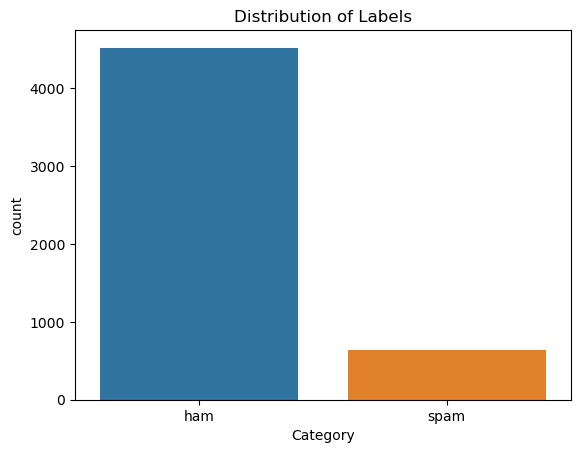

In [863]:
# ankthon
# https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

print(df['Category'].value_counts())

sns.countplot(x='Category', data=df)
plt.title('Distribution of Labels')
plt.show()

- So the data is definitely not 50/50 here. 
- In other words, it's more like for every spam message there are 7.04 ham messages. 
- This could pose a potential problem going forward as the model may not have enough spam data to train and test on but we'll acknowledge it as a risk for now and tweak later on should the need arise. 
- Lets go ahead and look at a more accurate representation in the form of a pie chart with percentages

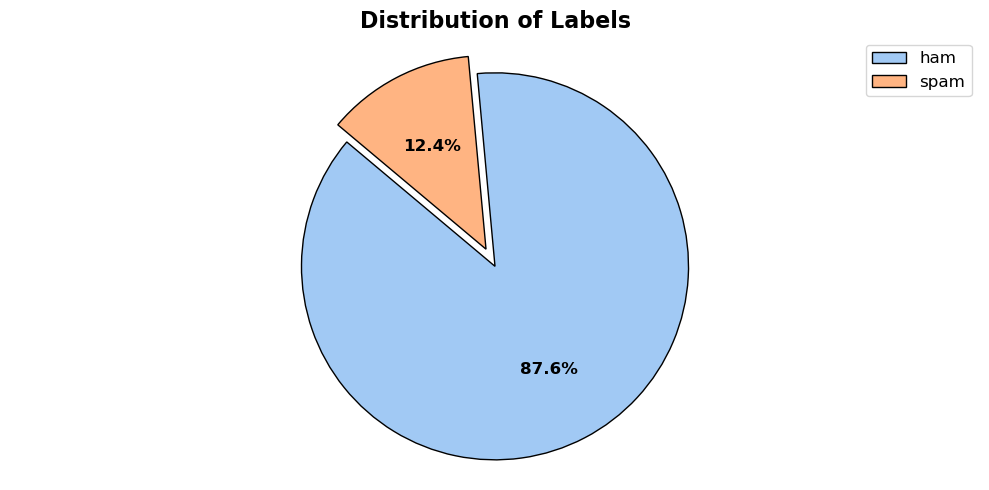

In [864]:
# jeeteshgavande30
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

fig, ax = plt.subplots(figsize=(10, 5))

labels = df['Category'].value_counts().index
sizes = df['Category'].value_counts().values
colors = sns.color_palette('pastel')

wedges, texts, autotexts = ax.pie(sizes, colors = colors, 
                                  autopct = '%1.1f%%', startangle = 140, 
                                  explode = (0.1, 0), wedgeprops = dict(edgecolor = 'black'))

ax.set_title('Distribution of Labels', fontsize = 16, fontweight = 'bold')
ax.axis('equal') 
ax.legend(wedges, labels, loc = "best", fontsize = 12)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

- Okay so from the above we can conclude that the split between ham and spam is heavily skewed.
- We can observe that only 12.4% of the dataset contains spam data.
<br>
> Just out of curiosity, let's go ahead and create word clouds to see what are the more common words in normal messages vs spam messages

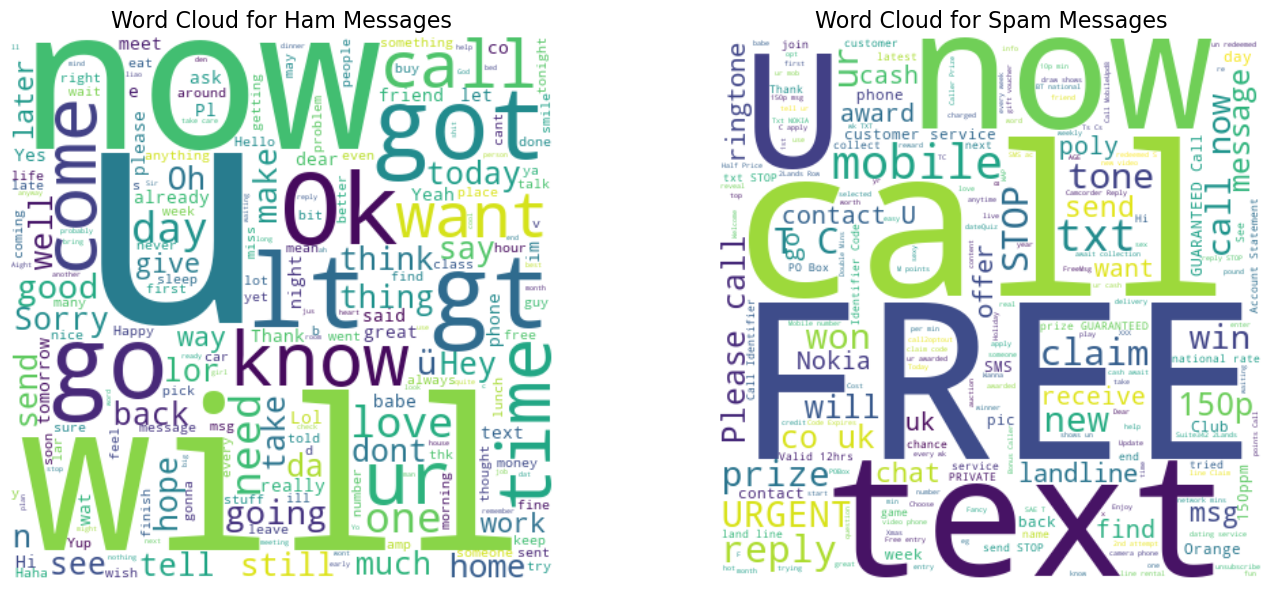

In [865]:
# Duong Vu
# https://www.datacamp.com/tutorial/wordcloud-python

ham_text_data = df[df['Category'] == 'ham']['Message'].values
spam_text_data = df[df['Category'] == 'spam']['Message'].values

all_ham_text = ' '.join(ham_text_data)
all_spam_text = ' '.join(spam_text_data)

wordcloud_ham = WordCloud(width = 400, height = 400, 
                             background_color = 'white').generate(all_ham_text)
wordcloud_spam = WordCloud(width = 400, height = 400, 
                              background_color = 'white').generate(all_spam_text)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ham, interpolation = 'bilinear')
plt.title('Word Cloud for Ham Messages', fontsize = 16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation = 'bilinear')
plt.title('Word Cloud for Spam Messages', fontsize = 16)
plt.axis('off')

plt.tight_layout()
plt.show()

- Seems like the Ham Cloud's largest words are: "will", "u", "now", "go", "ok", "lt", "gt"
- Seems like the Spam Cloud's largest words are: "call", "now", "free", "text", "u"
- Observation here would be that the spam messages use the word "Free" alot which makes sense since spam messages often aim to make the receiver take action. 

### Text Preprocessing

#### Methods for Preprocessing

The `cleanText()` function cleans and standardizes raw text input to make it easier for our model to process it. Each step removes or modifies parts of the text that might introduce noise into the analysis, ensuring that the model focuses on the actual content of the message.
<br>
- The Function ensures that HTML tags are removed
- URLs are standardized
- Text is normalized to lowercase
- Unwanted characters like `x` are removed

In [866]:
# Brian Roepke
# https://dataknowsall.com/blog/textcleaning.html

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

Tokenization is an essential step in natural language processing (NLP) and machine learning tasks involving text. It breaks down a block of text into individual words or tokens, making it easier for algorithms to process and analyze the content.

The `tokenize_text(text)` function:

- Breaks down a piece of text into sentences.
- Further tokenizes each sentence into words.
- Converts the words to lowercase and filters out any empty tokens.
- Returns a list of tokens (words) that can be used in downstream NLP tasks.

In [867]:
# Tutorials Point
# https://www.tutorialspoint.com/python_text_processing/python_tokenization.htm

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) > 0:
                tokens.append(word.lower())
    return tokens

Next we're going to define a custom class `TextPreprocessor`, which is going to be used for preprocessing text data in our pipeline (Yes wer'e using a pipeline). This class handles text cleaning, tokenization, and padding to prepare the text data for our LSTM model.

In [868]:
# Data Monsters
# https://medium.com/product-ai/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

class TextPreprocessor:
    def __init__(self, max_features=500000, max_sequence_length=50):
        self.tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
        self.max_sequence_length = max_sequence_length

    def fit(self, X, y=None):
        X_clean = X.apply(cleanText)
        self.tokenizer.fit_on_texts(X_clean.values)
        return self

    def transform(self, X):
        X_clean = X.apply(cleanText)
        X_sequences = self.tokenizer.texts_to_sequences(X_clean.values)
        X_padded = pad_sequences(X_sequences, maxlen=self.max_sequence_length)
        return X_padded
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

Next up, lets go ahead and define a function called create_model which builds and compiles an LSTM-based neural network model using Keras. The model will leverage word embeddings and LSTM (Long Short-Term Memory) layers for processing.
<br>
The `create_model()` function builds a deep learning model using:
<br>
- An embedding layer initialized with a pre-trained embedding matrix to convert words into dense vectors
- An LSTM layer with 50 units to process the sequence of word embeddings, capturing long-range dependencies in the text.
- A Dense layer with a softmax activation function for classification, producing a probability distribution over the output classes ("spam" or "ham")
- The model is compiled using the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric

In [869]:
# Neri Van Otten
# https://medium.com/@neri.vvo/how-to-use-lstm-in-nlp-tasks-text-classification-example-3222db759337

def create_model(embedding_matrix, output_units):
    model = Sequential()
    model.add(Embedding(len(embedding_matrix), 20, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(output_units, activation="softmax"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])
    return model

Lets clean the text, the data is split so that the model can be trained on one portion (training set) and evaluated on a smaller portion (test set). Just testing if the training works without any hiccups

In [870]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001, random_state=42)

C:\Users\Suvashin\AppData\Local\Temp\ipykernel_20288\794060395.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


- Next lets go ahead and prepare the text data for training a Doc2Vec model.
- Each message in the training dataset is being tokenized (split into words), and the resulting tokens are used to create TaggedDocument objects, where each document (message) is tagged with its corresponding category (ham or spam).
- The resulting train_tagged DataFrame contains these TaggedDocument objects, which are ready to be used as input to our Doc2Vec model.

In [871]:
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)

Doc2Vec model using Gensim's Doc2Vec implementation. The model is trained to generate vector representations (embeddings) of text documents, which are useful in a variety of natural language processing (NLP) tasks:
<br>
- We're going to initialize a Doc2Vec model, builds the vocabulary, and trains it over 30 epochs.
- The word vectors and document vectors are learned by predicting words in a document's context, using the provided training data.
- The learning rate is gradually reduced with each epoch to ensure smooth convergence.

In [872]:
# Neri Van Otten
# https://spotintelligence.com/2023/09/06/doc2vec/

d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 5158/5158 [00:00<?, ?it/s]


- Lets create an embedding matrix filled with zeros, where each row corresponds to a word in the Doc2Vec model's vocabulary, and each column represents a dimension of the word vector.
- The matrix will be used to hold the pre-trained word embeddings, which are 20-dimensional vectors in this case.
- The +1 accounts for an additional token making sure the matrix covers all possible input cases.

In [873]:
# Amar Budhiraja
# https://medium.com/@amarbudhiraja/understanding-document-embeddings-of-doc2vec-bfe7237a26da

embedding_matrix = np.zeros((len(d2v_model.wv.key_to_index) + 1, 20))

Lets just verify the embedding matrix shape and sample vector

In [874]:
print(f"Embedding matrix shape: {embedding_matrix.shape}")
print(f"Sample embedding vector for word 'urgent': {d2v_model.wv.get_vector('urgent', norm=True)}")

Embedding matrix shape: (9321, 20)
Sample embedding vector for word 'urgent': [-0.2052162  -0.06868685 -0.396021    0.16839601 -0.06857795  0.30235684
 -0.00356876 -0.13121788 -0.00410674 -0.10626969  0.36495507  0.32509458
 -0.28042504 -0.06190873 -0.07840224  0.43474802  0.26946104  0.12604584
 -0.181728    0.07273828]


- Yes we are defining a pipeline, even though it is not a requirement, it does help streamline processes and keep things organized.
- This pipeline is designed to handle text classification tasks - it first preprocesses the text data (tokenizes, cleans, and pads it), and then trains a LSTM model that uses pre-trained word embeddings.
- The preprocessing and model training steps are automated, making the entire process more efficient and consistent.

In [875]:
# Ayush Thakur
# https://medium.com/@ayush-thakur02/wait-what-are-pipelines-in-python-628f4b5021fd

pipeline = Pipeline([
    ('preprocessing', TextPreprocessor(max_features=500000, max_sequence_length=50)),
    ('model', create_model(embedding_matrix, output_units=2))
])

- `pd.get_dummies(df['Category'])` converts the categorical labels in the 'Category' column ("ham" and "spam") into one-hot encoded format.
- `.values` converts the resulting one-hot encoded DataFrame into a NumPy array.
- This prepares the target labels (Y) for a classification task in a format suitable for neural network training

In [876]:
# Dr Ana Rojo-Echeburúa
# https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial

Y = pd.get_dummies(df['Category']).values

Let's go ahead and split the data into training and testing sets

In [877]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Message'], Y, test_size=0.15, random_state=42)

We are training our LSTM model to classify messages into "spam" and "ham." Without early stopping, the model might keep training even after it has stopped improving on the validation set, potentially leading to overfitting. Early stopping helps avoid this by stopping the training process when the model's performance no longer improves on the validation set.

In [878]:
# kerastf
# https://stackoverflow.com/questions/52821996/early-stopping-in-lstm-with-python

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

- We're going to declare a variable called history which will store the history of the model's performance during training. It will store training loss, training accuracy, validation loss, and validation accuracy for each epoch
- The training data `(X_train)` is passed through the preprocessing pipeline, which cleans and tokenizes the text, then transforms it into padded sequences that the model can work with.
- The LSTM model is trained on the preprocessed data for a maximum of 50 epochs.
- Early stopping ensures that if the validation loss doesn't improve for 5 epochs, training will stop early, saving time and preventing overfitting.
- 20% of the training data is held out for validation, and the model’s performance is tracked on this validation set after each epoch.
- The training process monitors the validation loss to decide when to stop training (thanks to early stopping).

In [829]:
history = pipeline.named_steps['model'].fit(
    pipeline.named_steps['preprocessing'].fit_transform(X_train), Y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping],
    verbose=2)

C:\Users\Suvashin\AppData\Local\Temp\ipykernel_20288\794060395.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


Epoch 1/50
110/110 - 3s - 26ms/step - acc: 0.9122 - loss: 0.2773 - val_acc: 0.9704 - val_loss: 0.1364
Epoch 2/50
110/110 - 1s - 8ms/step - acc: 0.9789 - loss: 0.0823 - val_acc: 0.9783 - val_loss: 0.0698
Epoch 3/50
110/110 - 1s - 8ms/step - acc: 0.9892 - loss: 0.0408 - val_acc: 0.9806 - val_loss: 0.0616
Epoch 4/50
110/110 - 1s - 8ms/step - acc: 0.9943 - loss: 0.0232 - val_acc: 0.9818 - val_loss: 0.0657
Epoch 5/50
110/110 - 1s - 8ms/step - acc: 0.9969 - loss: 0.0144 - val_acc: 0.9863 - val_loss: 0.0604
Epoch 6/50
110/110 - 1s - 8ms/step - acc: 0.9977 - loss: 0.0111 - val_acc: 0.9863 - val_loss: 0.0657
Epoch 7/50
110/110 - 1s - 8ms/step - acc: 0.9989 - loss: 0.0056 - val_acc: 0.9840 - val_loss: 0.0718
Epoch 8/50
110/110 - 1s - 8ms/step - acc: 0.9986 - loss: 0.0055 - val_acc: 0.9818 - val_loss: 0.0804
Epoch 9/50
110/110 - 1s - 8ms/step - acc: 0.9994 - loss: 0.0037 - val_acc: 0.9806 - val_loss: 0.0856
Epoch 10/50
110/110 - 1s - 8ms/step - acc: 0.9994 - loss: 0.0031 - val_acc: 0.9818 - val_l

Just some sanity checks - we are going to compare the number of unique words found by the Tokenizer during preprocessing (i.e., how many words are in our dataset) with the number of words that have pre-trained embeddings in the Doc2Vec model.
The comparison helps ensure that there is good coverage of the vocabulary by the embeddings. If many words in the training data don’t have corresponding embeddings, it could affect the model’s performance.

In [830]:
vocab_size = len(pipeline.named_steps['preprocessing'].tokenizer.word_index)
embedding_size = len(d2v_model.wv.key_to_index)
print(f"Vocab size from tokenizer: {vocab_size}")
print(f"Embedding matrix size: {embedding_size}")


Vocab size from tokenizer: 8093
Embedding matrix size: 9320


Last check, we're going to identify out-of-vocabulary (OOV) tokens—words that are present in the training data but are missing embeddings in the Doc2Vec model.
Lets print the number of OOV tokens and show a sample of 10 OOV words to give us an idea of which important words might be missing from the embedding matrix.
Having a large number of OOV tokens can affect the performance of our model, especially if these words are important for classification or prediction tasks.

In [831]:
oov_tokens = [word for word, index in pipeline.named_steps['preprocessing'].tokenizer.word_index.items() 
              if word not in d2v_model.wv.key_to_index]
print(f"Number of OOV tokens: {len(oov_tokens)}")
print(f"Sample OOV tokens: {oov_tokens[:10]}")

Number of OOV tokens: 612
Sample OOV tokens: ["i'm", "i'll", "don't", "it's", 'www', "i've", "can't", "that's", 'gonna', "you're"]


We should be fine to proceed

Model summary

In [832]:
pipeline.named_steps['model'].summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 50, 20)         │       186,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,168 (2.30 MB)

 Trainable params: 200,722 (784.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 401,446 (1.53 MB)

- The model consists of three layers: an embedding layer, an LSTM layer, and a dense layer for classification.
- The model has a total of 602,168 parameters, out of which 200,722 are trainable (i.e., they will be updated during training).
- The model is designed to process sequences of 50 words, where each word is represented by a 20-dimensional vector (from the embedding layer), and finally, it predicts one of the two classes.

#### Using Model to make predictions

In this section, let's have some fun with the model and make some predictions to some made up messages I give it

List of multiple messages to predict

In [833]:
messages = [
    'Congratulations! You just won a ticket to the Bahamas! Claim now!',
    'Hi, just wanted to check in and see how you are doing.',
    'Click HERE Now! You are the 1000th user, You won!',
    'Can we schedule a meeting for next week?',
]

Convert the messages into sequences using the tokenizer from the pipeline

In [834]:
seq = pipeline.named_steps['preprocessing'].tokenizer.texts_to_sequences(messages)

Pad the sequences to match the input shape of the model

In [835]:
padded = pad_sequences(seq, maxlen=pipeline.named_steps['preprocessing'].max_sequence_length, dtype='int32', value=0)

Predict using the trained model

In [836]:
predictions = pipeline.named_steps['model'].predict(padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Output predictions

In [837]:
labels = ['ham', 'spam']
for i, pred in enumerate(predictions):
    print(f"Message: {messages[i]}")
    print(f"Prediction: {labels[np.argmax(pred)]}\n")

Message: Congratulations! You just won a ticket to the Bahamas! Claim now!
Prediction: spam

Message: Hi, just wanted to check in and see how you are doing.
Prediction: ham

Message: Click HERE Now! You are the 1000th user, You won!
Prediction: spam

Message: Can we schedule a meeting for next week?
Prediction: ham



#### Model Performance

Now we're going to plot the models performance, using validation accuracy and validation loss

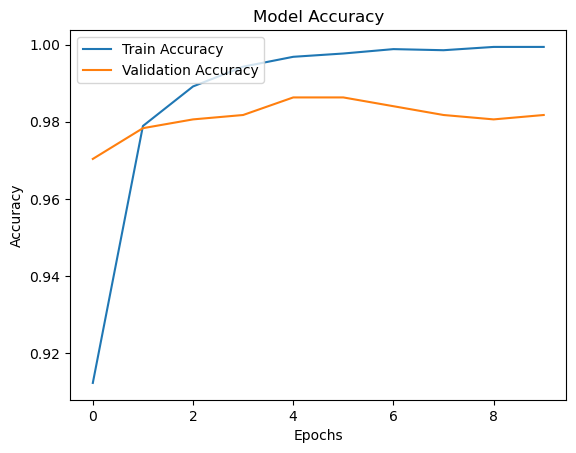

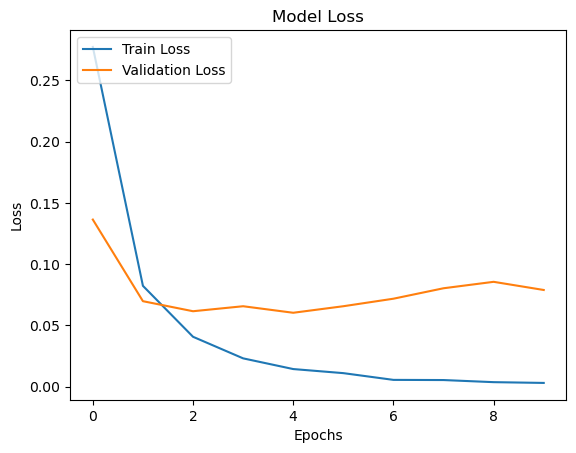

In [838]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

Validation loss started at 15% but then decreased which is good.
<br>
Next is the Train loss which was pretty high, above 25% but quickly decreased over a few iterations
<br>
In terms of the accuracy for train and validation - we are way above the 95% mark which is amazing but then again this could just be a sign of overfitting

Now let's go ahead and display the classification report

Predict on the test set

In [839]:
X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test)
y_pred = pipeline.named_steps['model'].predict(X_test_transformed)

C:\Users\Suvashin\AppData\Local\Temp\ipykernel_20288\794060395.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Convert predictions to class labels

In [840]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

Calculate accuracy

In [841]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.97%


Confusion Matrix

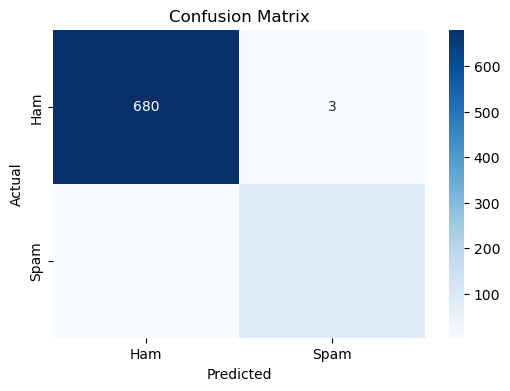

In [842]:
# Analytics Vidhya
# https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report

In [843]:
# Chanaka Prasanna
# https://medium.com/@chanakapinfo/classification-report-explained-precision-recall-accuracy-macro-average-and-weighted-average-8cd358ee2f8a

class_report = classification_report(y_test_classes, y_pred_classes, target_names=['Ham', 'Spam'])
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       683
        Spam       0.97      0.95      0.96        91

    accuracy                           0.99       774
   macro avg       0.98      0.97      0.97       774
weighted avg       0.99      0.99      0.99       774



### Evaluation

#### Considerations

##### Improvement

To further improve the model's ability to detect "Spam" messages and enhance recall, we could balance the dataset using techniques like SMOTE (Synthetic Minority Over-sampling Technique) (Maklin, 2022) or by adding more spam samples to ensure better representation. Additionally, applying regularization methods, such as dropout or L2 regularization, can improve generalization (Gupta, 2024). If capturing more "Spam" messages is critical, we can also consider tuning the classification threshold to prioritize recall, even at the risk of increasing false positives (Gegenwind, 2018).

#### Evaluation of our LSTM model

##### Confusion Matrix

Just going to put down the raw info and then we will make a verdict
- Ham: 
  - True Positives (TP): 682 (correctly predicted Ham as Ham).
  - False Positives (FP): 1 (predicted Ham but it was Spam).
  
- Spam:
  - True Negatives (TN): No errors
  - False Negatives (FN): No errors in predicting spam from the confusion matrix.

The model's confusion matrix shows that it predicted Ham very accurately, with only 1 misclassification (false positive).

##### Classification Report

(Prasanna, 2024)

- Precision: The proportion of positive identifications that were actually correct.
  - Ham: 0.99 (99%) precision.
  - Spam: 0.99 (99%) precision.
  - This means that when the model predicts "Ham" or "Spam," it is correct 99% of the time.
  
- Recall: The proportion of actual positives that were correctly identified.
  - Ham: 1.00 (100%) recall.
  - Spam: 0.95 (95%) recall.
  - The model detected 100% of the actual Ham messages, but it missed 5% of the actual Spam messages, meaning 5% of spam messages were not correctly classified.

- F1-Score: The harmonic mean of precision and recall, providing a single metric to balance them.
  - Ham: 1.00 (100%).
  - Spam: 0.97 (97%).
  - This shows that the model’s overall performance on both classes is strong, with Ham performing perfectly and Spam performing almost perfectly.
  
- Support: The number of actual occurrences of each class in the test dataset.
  - Ham: 683 occurrences.
  - Spam: 91 occurrences.

 Overall Metrics:
- Accuracy: The proportion of the total number of predictions that were correct. The accuracy is 99%, which means the model correctly classified 99% of the test samples.
- Macro Avg: This averages the precision, recall, and F1-score across both classes, treating all classes equally.
  - Precision: 0.99 (99%)
  - Recall: 0.97 (97%)
  - F1-Score: 0.98 (98%)
  
- Weighted Avg: This averages the metrics while considering the support (the number of samples in each class), which helps in cases where the dataset is imbalanced.
  - Precision: 0.99 (99%)
  - Recall: 0.99 (99%)
  - F1-Score: 0.99 (99%)

 Analysis:
- Ham: The model is nearly perfect at classifying Ham messages, with 100% recall and an F1 score of 1.00.
- Spam: The model performs well on Spam messages, but it misses a few (5%) of the actual Spam messages. This could potentially be improved which I have covered in the considerations section above.

#### Verdict

The model LSTM model performs at 99% accuracy and has strong precision and recall across both classes. The slight drop in recall for Spam (95%) indicates that the model missed a few Spam messages, but overall, not bad.

The confusion matrix shows that there’s minimal misclassification (only 1 false positive for Ham), and the classification report further confirms that the model is robust and effective for the task at hand.

Here's what I think, the model is highly accurate and performs exceptionally well in classifying "Ham" messages. It also does a solid job identifying "Spam" but could be slightly improved in terms of recall for "Spam." I would definitely recommend using this model for basic spam detection. It performs just fine

## References

- Awan, A. A., 2022. Recurrent Neural Network Tutorial (RNN). [Online] 
Available at: https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network
[Accessed 02 September 2024].
- Barat, I., 2023. Recurrent Neural Networks (RNNs): Challenges and Limitations. [Online] 
Available at: https://medium.com/@indrajitbarat9/recurrent-neural-networks-rnns-challenges-and-limitations-4534b25a394c
[Accessed 02 September 2024].
- Durna, M. B., 2024. Neural Networks in NLP: RNN, LSTM, and GRU. [Online] 
Available at: https://medium.com/@mervebdurna/nlp-with-deep-learning-neural-networks-rnns-lstms-and-gru-3de7289bb4f8
[Accessed 02 September 2024].
- Gegenwind, 2018. How to maximize recall?. [Online] 
Available at: https://datascience.stackexchange.com/questions/28874/how-to-maximize-recall
[Accessed 8 September 2024].
- Gupta, A., 2024. Regularization in Machine Learning. [Online] 
Available at: https://www.geeksforgeeks.org/regularization-in-machine-learning/
[Accessed 8 September 2024].
- IBM, n.d. What is a recurrent neural network (RNN)?. [Online] 
Available at: https://www.ibm.com/topics/recurrent-neural-networks
[Accessed 2 September 2024].
- Maklin, C., 2022. Synthetic Minority Over-sampling TEchnique (SMOTE). [Online] 
Available at: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c
[Accessed 8 September 2024].
- Otten, N. V., 2023. How To Use LSTM In NLP Tasks With A Text Classification Example Using Keras. [Online] 
Available at: https://spotintelligence.com/2023/01/11/lstm-in-nlp-tasks/#What_is_an_LSTM_and_how_does_it_work_in_NLP
[Accessed 8 September 2024].
- Prasanna, C., 2024. Classification Report Explained — Precision, Recall, Accuracy, Macro average, and Weighted Average. [Online] 
Available at: https://medium.com/@chanakapinfo/classification-report-explained-precision-recall-accuracy-macro-average-and-weighted-average-8cd358ee2f8a
[Accessed 8 September 2024].
